In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.special
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats #used to compute z score and remove outliers
from tqdm import tqdm

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

100%|██████████| 400/400 [6:17:17<00:00, 56.59s/it]    
C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

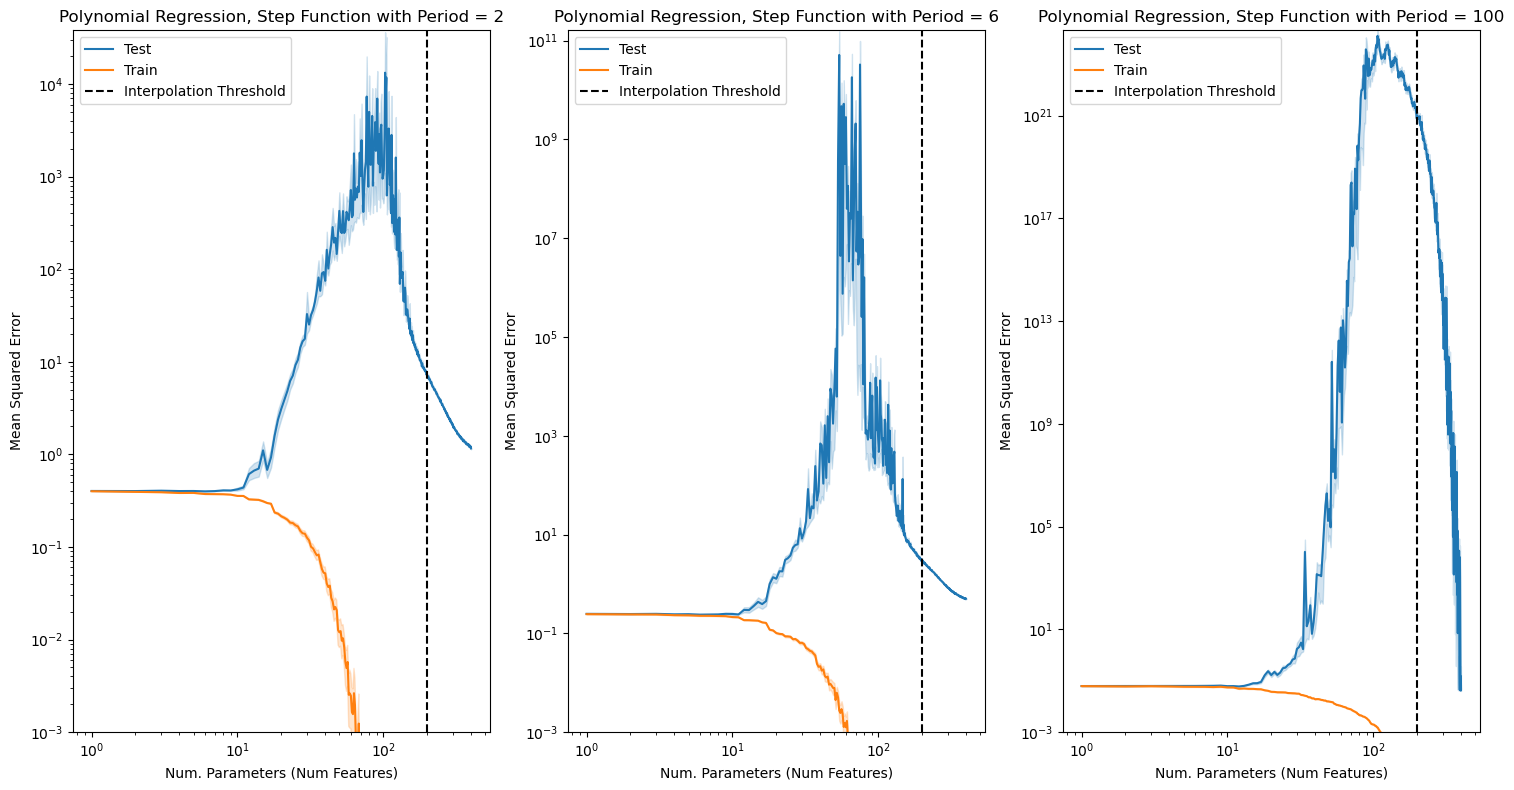

In [2]:
param_list = [2,6,100]

num_data = 200
num_features_list = np.arange(1, 401, 1, dtype=int)
num_repeats = 300

def linear_fitting(function, num_data, num_features_list, num_repeats):
    # Create sklearn linear regression object
    regr = linear_model.LinearRegression(fit_intercept=True)
    def compute_y_from_x(X: np.ndarray):
        return function(X)

    low, high = -1.0, 1.0
    mse_list = []
    # Generate test data.
    X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1) # Note that this value has been increase from 1000 to 10,000. This shouldn't impact loss calculations, but worth noting just in case.
    # Number of testing data points increased to properly sample across rapidly varying functions.
    y_test = compute_y_from_x(X_test)

    for num_features in tqdm(num_features_list):
        feature_degrees = 1 + np.arange(num_features).astype(int)
        for repeat_idx in range(num_repeats):
            # Sample training data.
            X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
            y_train = compute_y_from_x(X_train)

            # Fit a polynomial regression model.
            X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
            X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)
            beta_hat = np.linalg.pinv(X_train_poly) @ y_train
            y_train_pred = X_train_poly @ beta_hat
            y_test_pred = X_test_poly @ beta_hat
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            mse_list.append(
                {
                    "Num. Data": num_data,
                    "Num. Parameters (Num Features)": num_features,
                    "repeat_idx": repeat_idx,
                    "Train MSE": train_mse,
                    "Test MSE": test_mse,
                }
            )

    mse_df = pd.DataFrame(mse_list)
    return mse_df

def func_compare(param_list, num_data, num_features_list, num_repeats):
    #fig, axs = plt.subplots(len(param_list), 1, figsize=(8,5 * len(param_list)), sharey='row') # initialising the figure. Vertically placed
    fig, axs = plt.subplots(1, len(param_list), figsize=(5*len(param_list),8)) # horizonally placed
    mse_dfs = []
    for index, param in enumerate(param_list):
        
        def compute_y_from_x(X: np.ndarray): # Used for finding cosine values
            return np.power(np.cos(X * 10), param)
        function = compute_y_from_x
        mse_df = linear_fitting(function, num_data, num_features_list, num_repeats)
        mse_dfs.append(mse_df)
        #plt.close()
        # Use the axs object to plot on the specific subplot
        ax = axs[index]
        sns.lineplot(
            data=mse_df,
            x="Num. Parameters (Num Features)",
            y="Test MSE",
            label="Test",
            ax=ax  # specify the subplot
        )
        sns.lineplot(
            data=mse_df,
            x="Num. Parameters (Num Features)",
            y="Train MSE",
            label="Train",
            ax=ax  # specify the subplot
        )
        ax.set_ylabel("Mean Squared Error")
        ax.set_ylim(bottom=1e-3)
        ax.set_yscale("log")
        ax.set_xscale("log")
        ax.set_title(f"Polynomial Regression, Step Function with Period = {param}")
        ax.axvline(
            x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
        )
        ax.legend()

    # Adjust the layout of subplots
    plt.tight_layout()

    # Display the figure
    plt.show()
    return mse_dfs

mse_dfs = func_compare(param_list, num_data, num_features_list, num_repeats)
#mse_dfs stores all necessary data if I want to later alter the figures

C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

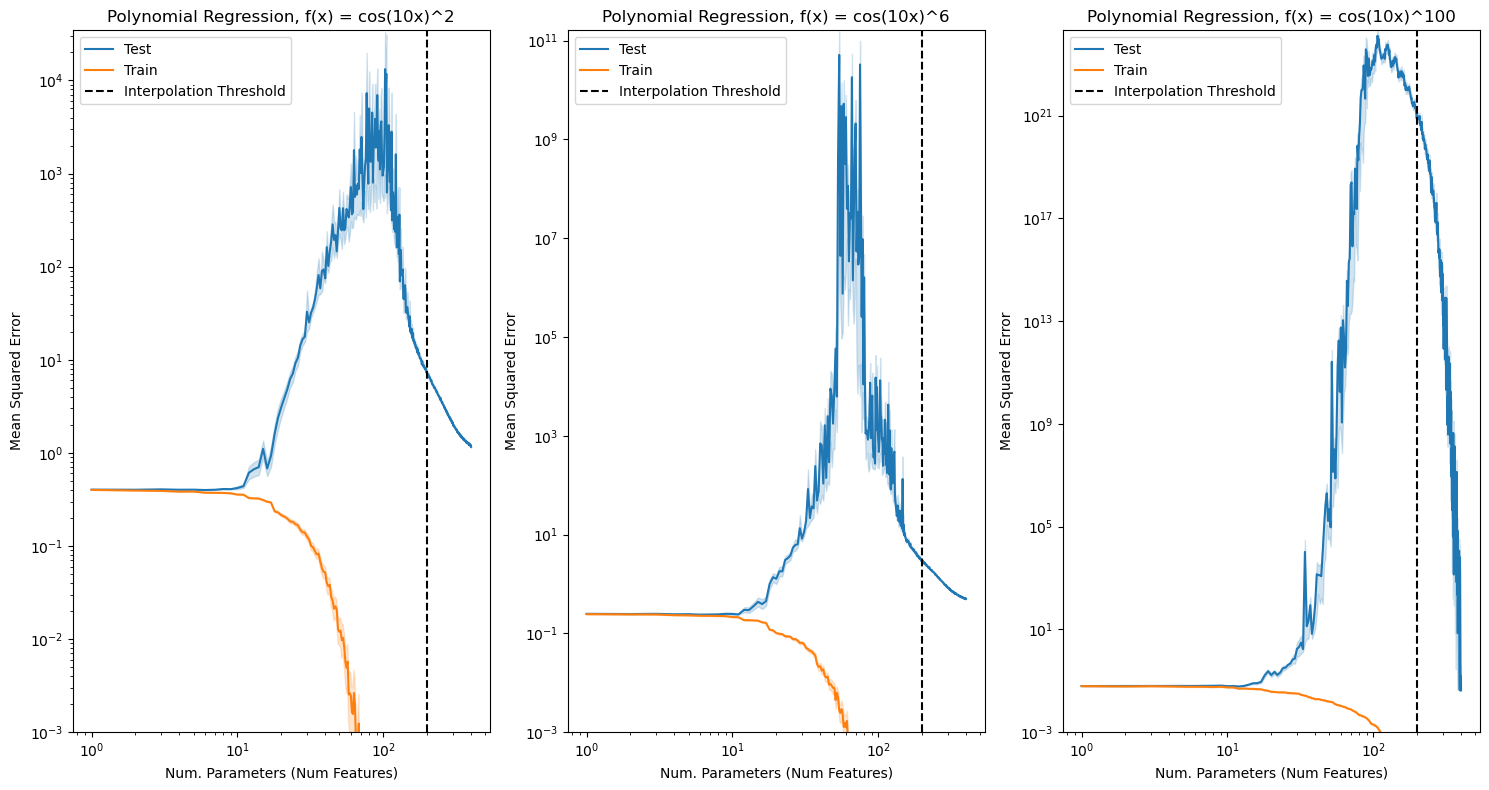

In [7]:
param_list = [2,6,100]

fig, axs = plt.subplots(1, len(param_list), figsize=(5*len(param_list),8))
for index, mse_df in enumerate(mse_dfs):
    param=param_list[index]
    ax = axs[index]
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Test MSE",
        label="Test",
        ax=ax  # specify the subplot
    )
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Train MSE",
        label="Train",
        ax=ax  # specify the subplot
    )
    ax.set_ylabel("Mean Squared Error")
    ax.set_ylim(bottom=1e-3)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_title(f"Polynomial Regression, f(x) = cos(10x)^{param}")
    ax.axvline(
        x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
    )
    ax.legend()

# Adjust the layout of subplots
plt.tight_layout()

# Display the figure
plt.show()

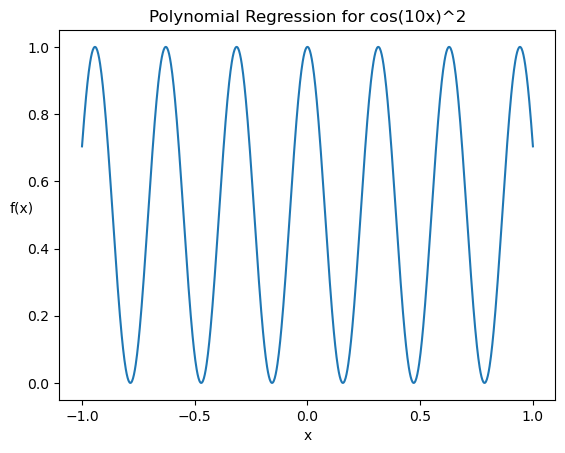

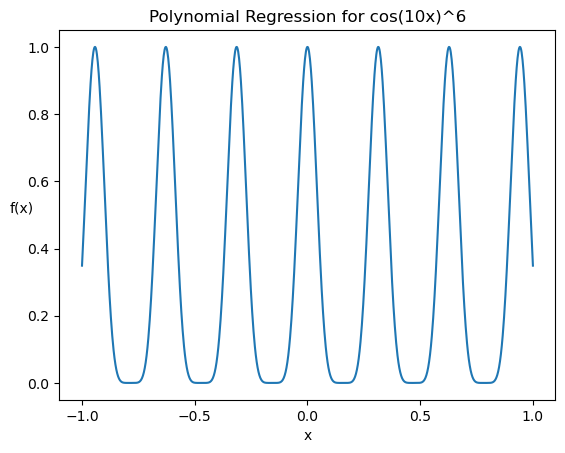

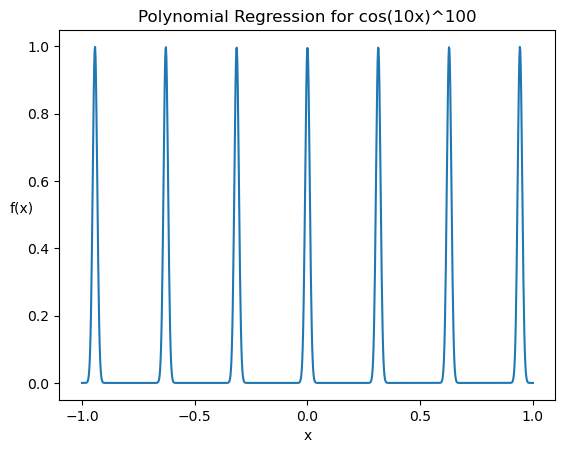

In [7]:
# Plotting graphs of the functions being fitted. Improved spikeiness

param_list = [2,6,100]

low, high = -1.0, 1.0

for param in param_list:
  def compute_y_from_x(X: np.ndarray): # Used for finding cosine values
    return np.power(np.cos(X * 10), param)

  function = compute_y_from_x
  X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1)
  Y_test = function(X_test)
  plt.close()
  plt.xlabel('x')
  plt.xticks(np.arange(-1, 1.5, 0.5))
  plt.ylabel('f(x)', rotation=0)
  #plt.yticks(np.arange(-1, 1.5, 0.5))
  plt.title(f"Polynomial Regression for cos(10x)^{param}")
  plt.plot(X_test, Y_test)
  plt.show()